11490434/11490434 [==============================] - 1s 0us/step


c:\users\sou05094\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


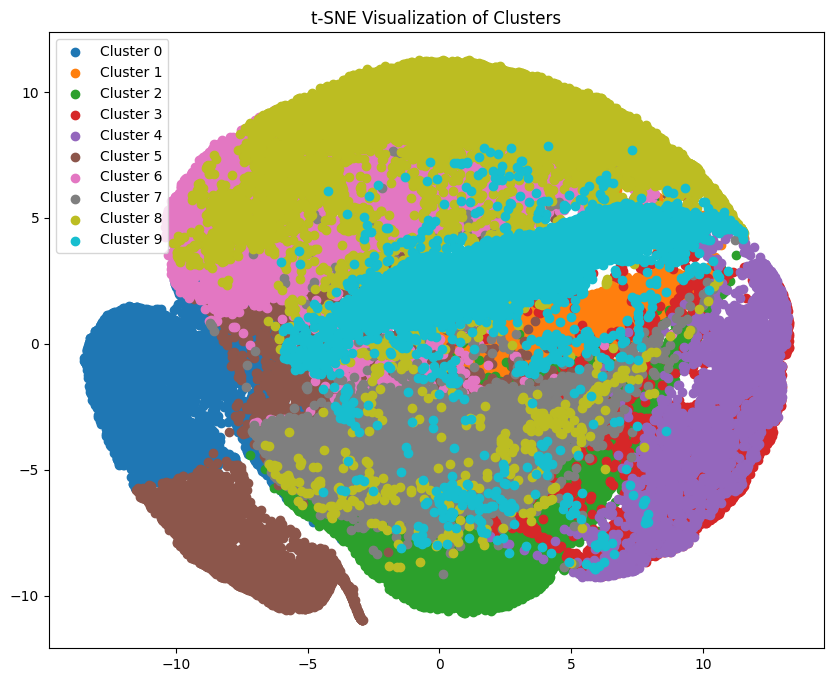

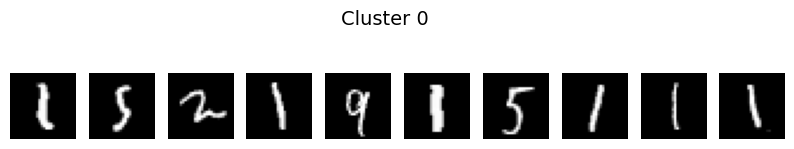

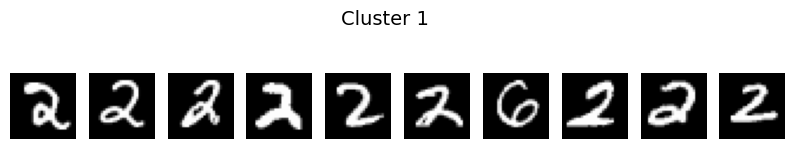

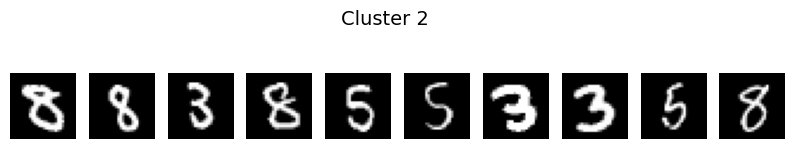

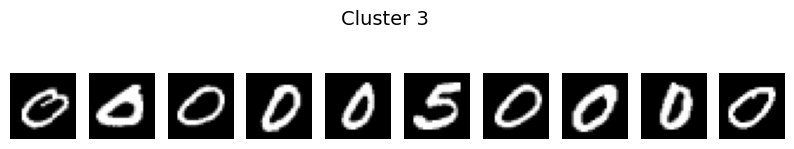

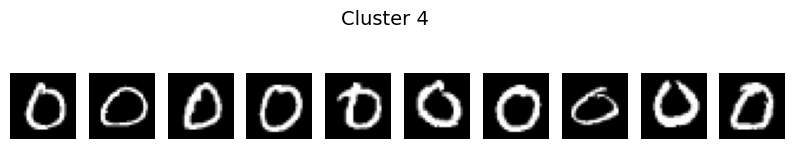

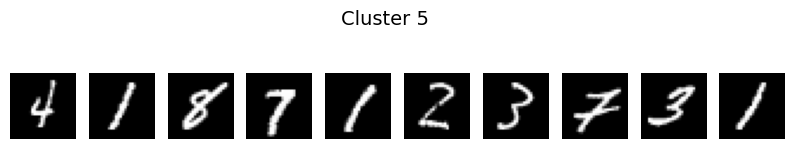

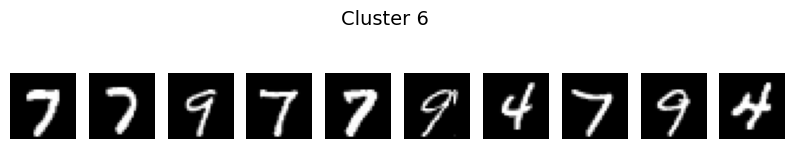

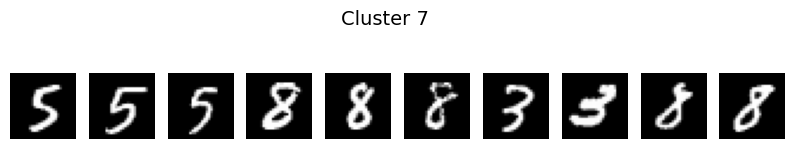

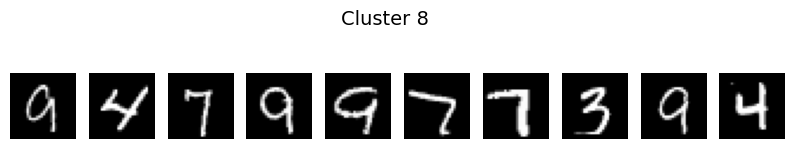

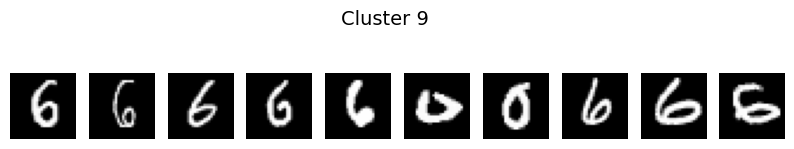

Label and Cluster Mapping:
{7: 5, 3: 0, 8: 4, 5: 8, 6: 9, 1: 2, 0: 1, 2: 3, 9: 6, 4: 0}


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# MNIST 데이터셋 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 이미지를 1차원으로 변환하여 정규화
x_train = x_train.reshape(-1, 28 * 28) / 255.0

# K-Means 군집화
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(x_train)

# t-SNE를 이용한 시각화를 위한 잠재벡터 준비
latent_vectors = kmeans.transform(x_train)
tsne = TSNE(n_components=2, perplexity=30.0, n_iter=300)
tsne_latent_vectors = tsne.fit_transform(latent_vectors)

# 군집화 결과 시각화
plt.figure(figsize=(10, 8))
colors = plt.cm.get_cmap('tab10').colors
for i in range(num_clusters):
    cluster_data = tsne_latent_vectors[kmeans.labels_ == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], color=colors[i], label=f'Cluster {i}')

plt.title('t-SNE Visualization of Clusters')
plt.legend()
plt.show()

# 각 군집에 속하는 이미지 출력
def plot_images_in_cluster(images, cluster_label):
    plt.figure(figsize=(10, 2))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f'Cluster {cluster_label}', fontsize=14)
    plt.show()

# 각 군집별로 랜덤한 이미지 출력
for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    random_indices = np.random.choice(cluster_indices, 10, replace=False)
    images_in_cluster = x_train[random_indices]
    plot_images_in_cluster(images_in_cluster, i)

# 라벨과 군집 분류 관계 출력
label_cluster_mapping = {label: cluster for label, cluster in zip(kmeans.labels_, y_train)}
print("Label and Cluster Mapping:")
print(label_cluster_mapping)
